In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/diazzzz/Buku-Machine-Learning/main/Exploratory%20Data%20Analysis/data_car.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#1. Checking the types of data

In [3]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

#2. Dropping irrelevant columns

In [4]:
df = df.drop(['Engine Fuel Type',
              'Market Category',
              'Vehicle Style',
              'Popularity',
              'Number of Doors',
              'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


# 3. Renaming the columns

In [5]:
df = df.rename(columns={'Engine HP': 'HP',
                        'Engine Cylinders': 'Cylinders',
                        'Transmission Type': 'Transmission',
                        'Driven_Wheels': 'Drive Mode',
                        'highway MPG': 'MPG-H',
                        'city mpg':'MPG-C',
                        'MSRP':'Price'})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


#4. Dropping the duplicate rows

In [9]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [8]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(989, 10)

In [11]:
df = df.drop_duplicates()

In [12]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

#5. Dropping the missing or null values

In this case, we just dropped the missing values

In [13]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [14]:
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [15]:
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


#6. Detecting Outliers

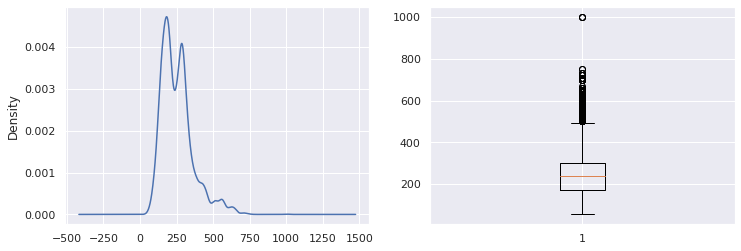

In [16]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['HP'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['HP'])
plt.show()

<AxesSubplot:xlabel='Price'>

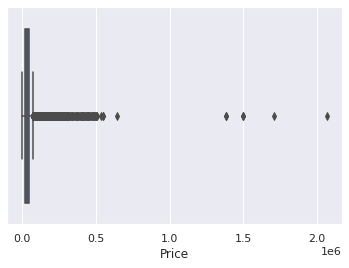

In [17]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='HP'>

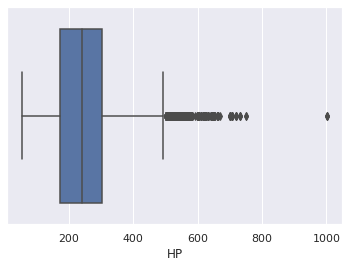

In [18]:
sns.boxplot(x=df['HP'])

<AxesSubplot:xlabel='Cylinders'>

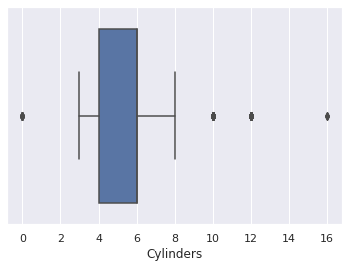

In [19]:
sns.boxplot(x=df['Cylinders'])

#7. Plot different features

## Histogram

In [22]:
df.Price.describe()

count    1.082700e+04
mean     4.249325e+04
std      6.229451e+04
min      2.000000e+03
25%      2.197250e+04
50%      3.084500e+04
75%      4.330000e+04
max      2.065902e+06
Name: Price, dtype: float64

Text(0.5, 0, 'Make')

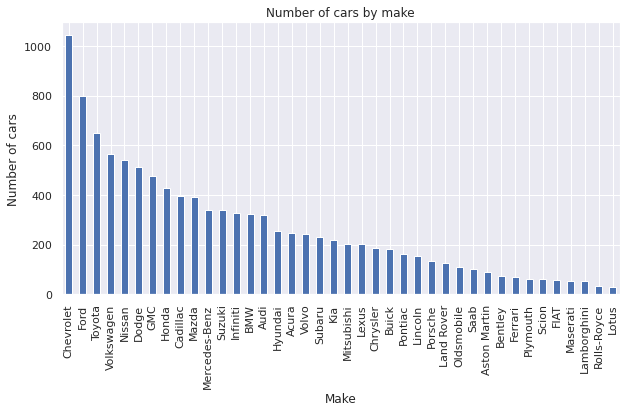

In [23]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make')

## Heat Maps

In [25]:
df[['HP','Price']].corr()

,HP,Price
HP,1.000000,0.659835
Price,0.659835,1.000000


In the below heat map we know that the price feature depends mainly on the Engine Size (HP)and Cylinders.

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG-H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


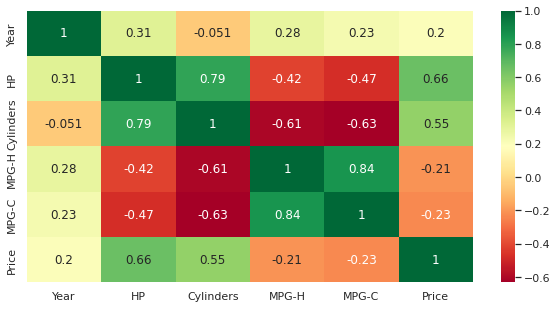

In [24]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c, cmap='RdYlGn', annot=True)
c

Multi-variate

Drive Mode        all wheel drive  four wheel drive  front wheel drive  \
Transmission                                                             
AUTOMATED_MANUAL    157828.994949               NaN       30761.103896   
AUTOMATIC            48403.715344      43019.606742       26441.647017   
DIRECT_DRIVE                  NaN               NaN       30318.181818   
MANUAL               60817.829016      12554.718412       15394.341637   
UNKNOWN                       NaN       2447.500000        2000.000000   

Drive Mode        rear wheel drive  
Transmission                        
AUTOMATED_MANUAL     175529.387097  
AUTOMATIC             56987.558117  
DIRECT_DRIVE          42700.000000  
MANUAL                44945.319690  
UNKNOWN                5146.500000  


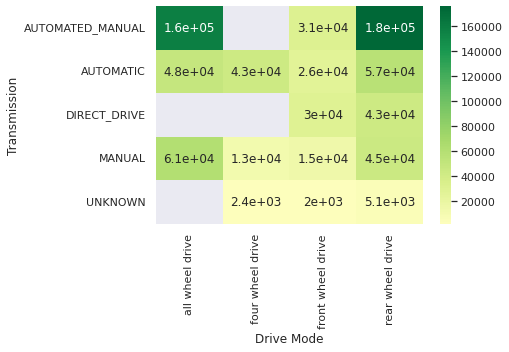

In [28]:
result = pd.pivot_table(data=df,
                        index='Transmission',
                        columns='Drive Mode',
                        values='Price')
print(result)

sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

##Scatterplot

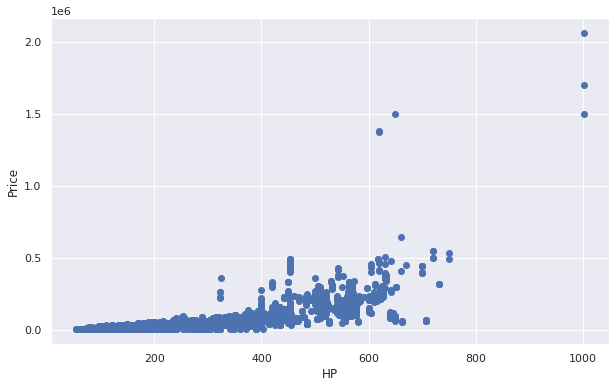

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

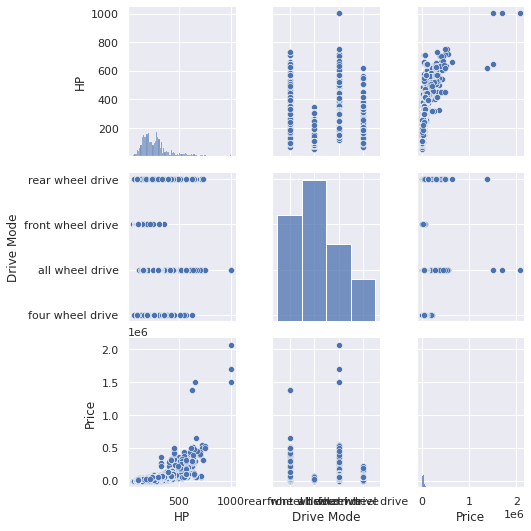

In [30]:
sns.pairplot(data = df, vars=['HP','Drive Mode','Price'])
plt.show()